# Introdução

## Ojetivo
  

<p>
A analise dos dados tem como objetivo analisar a base estatisticamente a base de dados do pense para responder as seguintes perguntas comportamentais:
 <li> Há diferença entre a idade de iniciação sexual entre os sexos? E entre escolas na capital e interior?
 <li> Há uma tendencia maior no consumo de bebidas alccolicas entre os meninos? Esse comportamento é padrão na capital e interior
 <li> Há iniciação sexual cedo( < 14 anos) tem relação com o uso cedo de drogas?
 <li> O consumo de cigarro leva a experimentar alcool e/ou outras drogas?

# Resumo

# Bibliotecas e Configurações

In [191]:
import pandas as pd
from  zipfile import ZipFile
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
from IPython.core.display import display, HTML, Markdown
import numpy as np
from statsmodels.stats.weightstats import zconfint
from statsmodels.stats.weightstats import DescrStatsW
from statsmodels.stats.weightstats import ztest
from scipy.stats import normaltest
from scipy.stats import ranksums

In [192]:
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
display(HTML("<style>.container { width:99% !important; }</style>"))

# Importação dos dados

In [193]:
path = 'Dados desafio 3.zip'

In [194]:
zip= ZipFile(path)
dados = pd.read_csv(zip.open(zip.namelist()[1]), sep = ";", thousands=".", decimal=",")

# Funções

In [195]:
def tabela_frequencia(df,coluna,legenda):
    frequencia = df[coluna].value_counts()
    percentual = round(df[coluna].value_counts(normalize=True)*100,2)
    dist_frequ = pd.DataFrame({'Frequência': frequencia, 'Percentual': percentual})
    dist_frequ.rename_axis(legenda, axis = 1, inplace=True)
    return dist_frequ

In [196]:
def k_sturges(amostra):
    k=int(1+((10/3)*np.log10(len(amostra))))
    return k

In [197]:
def crosstab_rename(pergunta1, respostas1, pergunta2, respostas2,titulo):
    crosstab = pd.crosstab(pergunta1,pergunta2,normalize='columns').round(4)*100
    crosstab.rename(index= respostas1, inplace= True)
    crosstab.rename(columns = respostas2, inplace= True)
    crosstab.rename_axis('', axis = 1, inplace=True)
    crosstab.rename_axis(titulo, axis = 'index', inplace=True)
    return crosstab

In [256]:
def histplot_segregado(df,pergunta,hue,legenda,legendax,dicionario_legenda):
    df[hue]=df[hue].map(dicionario_legenda)
    ax = sns.histplot(data=df,x=pergunta,color='blue',hue=hue,bins=len(df[df[pergunta]!=99][df[pergunta]!=-1][pergunta].unique()),palette='YlOrRd',stat='density',cumulative=True)
    ax.figure.set_size_inches(14,8)
    ax.set_title(legenda)
    ax.set_xlabel(legendax)
    plt.xticks(df[df[pergunta]!=99][df[pergunta]!=-1][pergunta].unique())
    plt.show()

### Dicionários:

In [250]:
idade_iniciacao_sexual= {
9:'9 anos ou menos',
10:'10 anos',
11:'11 anos',
12:'12 anos',
13:'13 anos',
14:'14 anos',
15:'15 anos',
16:'16 anos',
17:'17 anos',
18:'18 anos ou mais'    
}

tipo_municipio={
1:'Capital',
2:'Interior'
}

sexo={
1:'Masculino',
2:'Feminino'
}



## Exploração inicial dos dados

In [200]:
dados

,ANOPESQ,PAIS,REGEOGR,UFCENSO,MUNICIPIO_CAP,TIPO_MUNIC,VB00004,VB01001,VB01002,VB01003,...,VB16001A05,VB16001A06,VB16001A07,VB16001A08,ESTRATO_EXP,ESTRATOGEOREG,PESO,aluno,escola,turma
0,2015,76,1,11,1100205,1,1,2,1,14,...,2,2,2,2,110020521,1100205,3.738463,1,1,1787
1,2015,76,1,11,1100205,1,1,1,4,16,...,2,2,2,2,110020521,1100205,3.738463,2,1,1787
2,2015,76,1,11,1100205,1,1,1,1,13,...,2,2,2,2,110020521,1100205,3.738463,3,1,1787
3,2015,76,1,11,1100205,1,1,1,4,14,...,1,2,2,2,110020521,1100205,3.738463,4,1,1787
4,2015,76,1,11,1100205,1,1,1,1,14,...,2,1,2,2,110020521,1100205,3.738463,5,1,1787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102067,2015,76,5,53,5300108,1,1,2,1,14,...,2,2,1,2,530010821,5300108,16.873376,102068,3040,1883
102068,2015,76,5,53,5300108,1,1,2,4,14,...,2,2,1,2,530010821,5300108,16.873376,102069,3040,1883
102069,2015,76,5,53,5300108,1,1,2,4,14,...,1,2,2,2,530010821,5300108,16.873376,102070,3040,1883
102070,2015,76,5,53,5300108,1,1,1,4,15,...,1,2,2,2,530010821,5300108,16.873376,102071,3040,1883


In [201]:
dados.select_dtypes(include='object')

""
0
1
2
3
4
...
102067
102068
102069
102070


In [202]:
round((dados.notna().sum()/(dados.notna().sum() + dados.isna().sum()))*100,2)

ANOPESQ          100.0
PAIS             100.0
REGEOGR          100.0
UFCENSO          100.0
MUNICIPIO_CAP    100.0
                 ...  
ESTRATOGEOREG    100.0
PESO             100.0
aluno            100.0
escola           100.0
turma            100.0
Length: 174, dtype: float64

## Exploração dos dados que serão utilizados

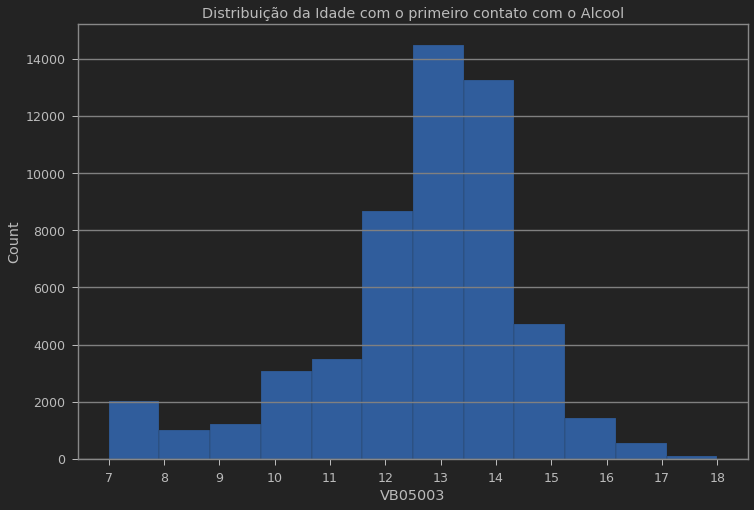

In [203]:
plt.figure(figsize=(12,8))
plt.title('Distribuição da Idade com o primeiro contato com o Alcool')
sns.histplot(dados['VB05003'][dados['VB05003']!=99][dados['VB05003']!=1],bins=12,kde=False,color='b')
plt.xticks(ticks=[7,8,9,10,11,12,13,14,15,16,17,18])
plt.grid(axis='y',c='grey')
plt.show()

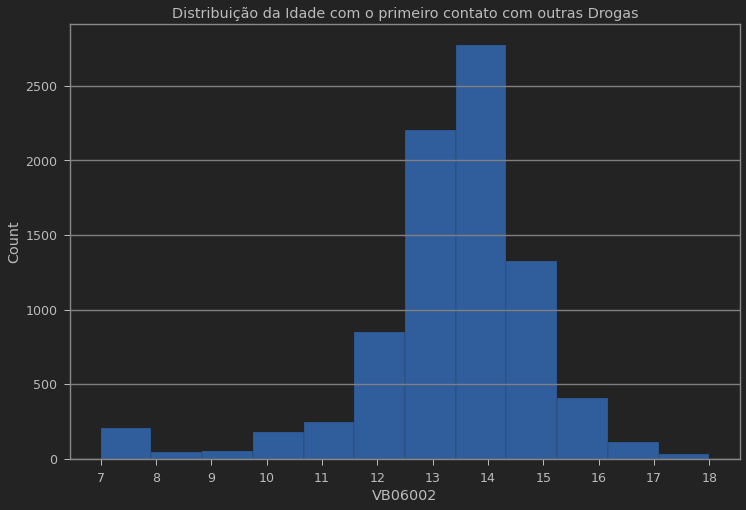

In [204]:
plt.figure(figsize=(12,8))
plt.title('Distribuição da Idade com o primeiro contato com outras Drogas')
sns.histplot(dados['VB06002'][dados['VB06002']!=99][dados['VB06002']!=-1],bins=12,kde=False,color='b')
plt.xticks(ticks=[7,8,9,10,11,12,13,14,15,16,17,18])
plt.grid(axis='y',c='grey')
plt.show()

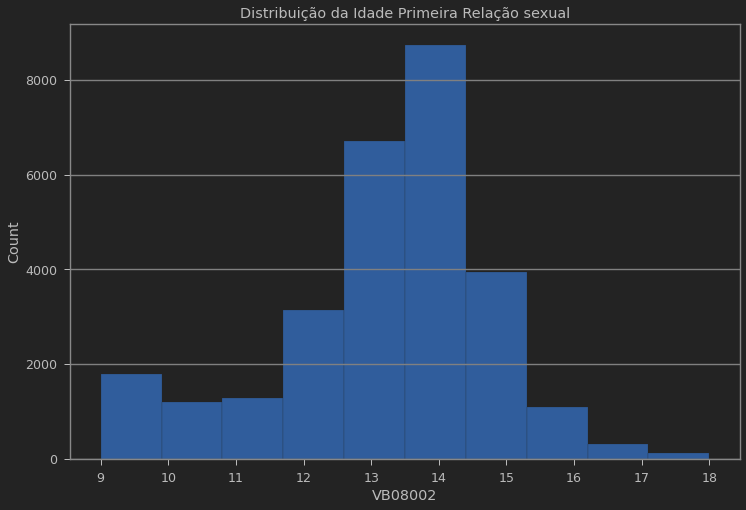

In [205]:
plt.figure(figsize=(12,8))
plt.title('Distribuição da Idade Primeira Relação sexual')
sns.histplot(dados['VB08002'][dados['VB08002']!=99][dados['VB08002']!=-1],bins=10,kde=False,color='b')
plt.xticks(ticks=[9,10,11,12,13,14,15,16,17,18])
plt.grid(axis='y',c='grey')
plt.show()

In [206]:
tabela_frequencia(dados,'VB08002','Idade Primeira Relação sexual')

Idade Primeira Relação sexual,Frequência,Percentual
-1,73495,72.00
14,8748,8.57
13,6712,6.58
15,3935,3.86
12,3146,3.08
9,1783,1.75
11,1290,1.26
10,1190,1.17
16,1096,1.07
17,317,0.31


In [207]:
tabela_frequencia(dados,'VB01021','Série Atual')

Série Atual,Frequência,Percentual
4,100497,98.46
3,1247,1.22
5,124,0.12
7,50,0.05
1,43,0.04
6,39,0.04
2,37,0.04
99,35,0.03


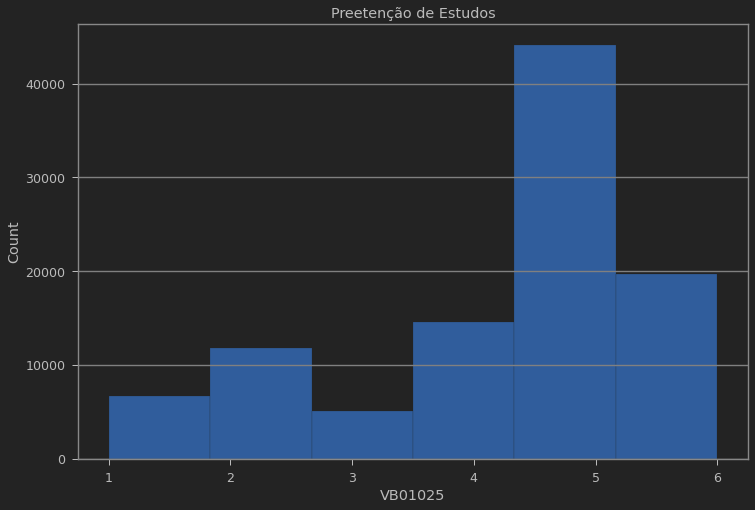

In [208]:
plt.figure(figsize=(12,8))
plt.title('Preetenção de Estudos')
sns.histplot(dados['VB01025'][dados['VB01025']!=99][dados['VB01025']!=-1],bins=6,kde=False,color='b')
plt.xticks(ticks=[1,2,3,4,5,6])
plt.grid(axis='y',c='grey')
plt.show()

In [209]:
tabela_frequencia(dados,'VB01025','Preetenção de Estudos')

Preetenção de Estudos,Frequência,Percentual
5,44167,43.27
6,19673,19.27
4,14536,14.24
2,11804,11.56
1,6706,6.57
3,5081,4.98
99,105,0.10


In [210]:
tabela_frequencia(dados,'VB04002','Primeiro Contato com cigarro')

Primeiro Contato com cigarro,Frequência,Percentual
-1,83349,81.66
13,4516,4.42
14,4147,4.06
12,2843,2.79
15,1597,1.56
11,1363,1.34
10,1203,1.18
7,1068,1.05
9,560,0.55
16,539,0.53


# Analise dos Dados

## Há diferença entre a idade de iniciação sexual entre os sexos? E entre escolas privadas e publicas? 

A pergunta sobre iniciação sexual é a VB08002 porém a maior parte das pessoas pularam esta questão, 72% do total por isso as conclusões podem divergir da realidade. Para a análise só será considerado a população que respondeu a pergunta.

In [211]:
dados['VB08002'][dados['VB08002']!=-1][dados['VB08002']!=99]

1         12
5         10
7         12
12        14
15        16
          ..
102059    12
102062    15
102064    14
102070    14
102071    14
Name: VB08002, Length: 28346, dtype: int64

In [212]:
crosstab_rename(dados['VB08002'][dados['VB08002']!=-1][dados['VB08002']!=99],idade_iniciacao_sexual,dados['TIPO_MUNIC'],tipo_municipio, 'Idade da Primeira Relação Sexual:')

,Capital,Interior
Idade da Primeira Relação Sexual:,,
9 anos ou menos,6.56,6.04
10 anos,4.06,4.33
11 anos,4.45,4.65
12 anos,11.46,10.76
13 anos,24.59,22.82
14 anos,31.46,30.29
15 anos,13.23,14.49
16 anos,3.23,4.47
17 anos,0.68,1.53


<ipython-input-258-251d0dc3f48b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  histplot_segregado(dados[dados['VB08002']!=99][dados['VB08002']!=-1],'VB08002','TIPO_MUNIC','Distribuição da primeira relação sexual por idade e separado por tipo de municipio','Idade',tipo_municipio)


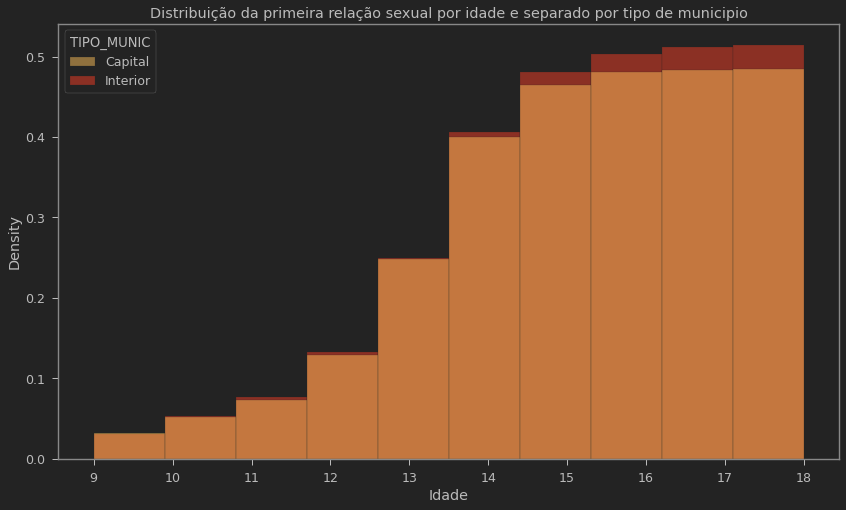

In [258]:
histplot_segregado(dados[dados['VB08002']!=99][dados['VB08002']!=-1],'VB08002','TIPO_MUNIC','Distribuição da primeira relação sexual por idade e separado por tipo de municipio','Idade',tipo_municipio)

In [239]:
print(dados['VB08002'][dados['VB08002']!=99][dados['VB08002']!=-1][dados['TIPO_MUNIC']==1].describe()[:3])
print( dados['VB08002'][dados['VB08002']!=99][dados['VB08002']!=-1][dados['TIPO_MUNIC']==2].describe()[:3])

count    13752.000000
mean        13.129654
std          1.733117
Name: VB08002, dtype: float64
count    14594.000000
mean        13.247225
std          1.809203
Name: VB08002, dtype: float64


Visualmente não parece ter diferenças significativas entre a capital e o interior, porem, como temos uma grande amostra podemos usar o teste Z para confirmar nossa hipotese. Porem não sabemos se as amostras são distribuições normais. Entao vamos verificar a normalidade das amostras.

In [243]:
normaltest(dados['VB08002'][dados['VB08002']!=99][dados['VB08002']!=-1][dados['TIPO_MUNIC']==1])

NormaltestResult(statistic=1116.3738897712049, pvalue=3.8237541887969135e-243)

In [244]:
normaltest(dados['VB08002'][dados['VB08002']!=99][dados['VB08002']!=-1][dados['TIPO_MUNIC']==2])

NormaltestResult(statistic=805.6041314394138, pvalue=1.1622125443805865e-175)

Como nossas amostras não são normais, para confirmar nossa hipotese temos que usar um testes de Wilcoxom ao invez do teste Z

In [248]:
ranksums(dados['VB08002'][dados['VB08002']!=99][dados['VB08002']!=-1][dados['TIPO_MUNIC']==1], dados['VB08002'][dados['VB08002']!=99][dados['VB08002']!=-1][dados['TIPO_MUNIC']==2])

RanksumsResult(statistic=-5.636576723885928, pvalue=1.7346377139004955e-08)

Apesar de aparecer similar as distribuições, nossas amostras são estatisticamente diferentes.  
Podemos agora fazer os mesmos testes para as diferenças entre o sexo masculino e feminino.

In [271]:
crosstab_rename(dados['VB08002'][dados['VB08002']!=-1][dados['VB08002']!=99],idade_iniciacao_sexual,dados['VB01001'],sexo, 'Idade da Primeira Relação Sexual:')

,Masculino,Feminino
Idade da Primeira Relação Sexual:,,
9 anos ou menos,8.95,1.61
10 anos,6.08,0.88
11 anos,6.04,1.94
12 anos,12.75,8.21
13 anos,22.41,25.91
14 anos,27.84,36.16
15 anos,11.48,18.09
16 anos,3.29,4.87
17 anos,0.82,1.64


<ipython-input-272-bc2b051ec13e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  histplot_segregado(dados[dados['VB08002']!=99][dados['VB08002']!=-1],'VB08002','VB01001','Distribuição da primeira relação sexual por idade e separado por sexo','Idade',sexo)


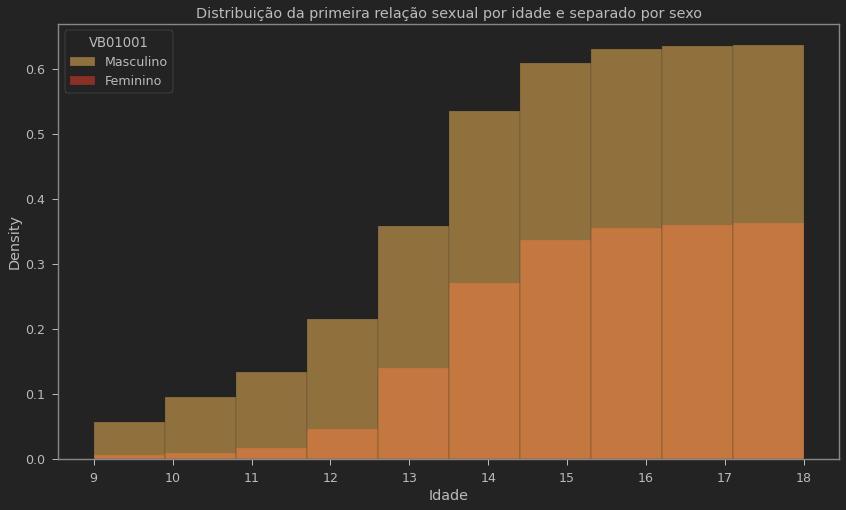

In [272]:
histplot_segregado(dados[dados['VB08002']!=99][dados['VB08002']!=-1],'VB08002','VB01001','Distribuição da primeira relação sexual por idade e separado por sexo','Idade',sexo)

In [273]:
normaltest(dados['VB08002'][dados['VB08002']!=99][dados['VB08002']!=-1][dados['VB01001']==1])

NormaltestResult(statistic=772.039477999991, pvalue=2.25817422785216e-168)

In [274]:
normaltest(dados['VB08002'][dados['VB08002']!=99][dados['VB08002']!=-1][dados['VB01001']==2])

NormaltestResult(statistic=815.308331459041, pvalue=9.079152247299627e-178)

In [275]:
ranksums(dados['VB08002'][dados['VB08002']!=99][dados['VB08002']!=-1][dados['VB01001']==1], dados['VB08002'][dados['VB08002']!=99][dados['VB08002']!=-1][dados['VB01001']==2])

RanksumsResult(statistic=-36.73370726057936, pvalue=2.116475105856769e-295)